# Sample vs Populaiton Statistics

We have some collection of numbers (measurements). Because we cannot measure everything, our data is only a **sample** from the true **population**. This sample may or may not fairly represent the whole population. Our sample has a **sample mean** ($\bar{X}$), which is not the same thing as the **population mean** ($\mu$). Each data point itself has some uncertainty associated with it. But this is the closest to the truth we're going to get. We need to fairly analyze what we know and how well we know it to guide our decisions.

### Sample Statistics

- Statistics from a relatively small sample, extracted from a known or unknown distribution.
- This is what we typically have available to us in the real world (some set of measurements).
- **Sample mean** written as $\bar{X}$
- **Sample variance** written as $s^2$ (square of the *sample standard deviation*)


### Population Statistics

- The underlying ("true") statistical characteristics of a probability distribution. 
- (Somewat imprecisely) We can think of the population statistics being those characteristics extracted from a very large sample, from a probability distribution that is assumed to be stationary (not changing over time). 
- In many cases we don't know know if the samples we have came from the same population or not - a lot of our statistical tests will be trying to determine this. 
- **Population mean** written as $\mu$
- **Population variance** written as $\sigma^2$ (square of the *population standard deviation*)

---

### Populaiton Mean, Variance, Standard Deviation:

When we have some populaiton, the **expected value** (also called the **mean value**, or the **first moment**) of a continuous random variable $x$, with Probability Density Function $f(x)$, is

$\mu = E(x) = \displaystyle\int_{-\infty}^{\infty} x \cdot f(x)\,dx$


The **variance** (How much do the values vary around the mean value? also called the **second moment**) of a continuous random variable $x$, with mean value $\mu$, with Probability Density Function $f(x)$, is

$\sigma^{2} = V(x) = \displaystyle\int_{-\infty}^{\infty} (x - \mu)^{2} \cdot f(x)\,dx = E[(x-\mu)^{2}]$

And the **standard deviation** of $x$ is the square root of the variance

$\sigma = \sqrt{V(x)} $

(From Devore textbook, see also: [mathematical "moments"](https://en.wikipedia.org/wiki/Moment_(mathematics)))

---

### Sample Mean, Variance, Standard Deviation:

We just have a sample from the population, and can calculate the mean, variance, and standard deviation as follows:

**Sample Mean:** [`np.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

$\bar{X} = \displaystyle\sum_{i=1}^{n} \frac{X_i}{n}$



**Sample Variance:** [`np.var(...,ddof=1)`](https://numpy.org/doc/stable/reference/generated/numpy.var.html)

$s^{2} = \displaystyle\sum_{i=1}^{n} \frac{(X_i - \bar{X})^2}{(n-1)}$


**Sample Standard Deviation:** [`np.std(...,ddof=1)`](https://numpy.org/doc/stable/reference/generated/numpy.var.html)

$s = \sqrt{s^2}$

(See Ch. 1 of Helsel et al., 2020)

---

# Probability Distributions

- One way to assess data is to assume it came from a certain distribution
- We can think about this by making plots to visualize the shapes of distributions:
  - probability density functions (PDFs)
  - cumulative density functions (CDFs)
  - quantile plots
- We can generate random numbers from a known distribution to get examples



## Probability Density Functions - Theory

The probability, or likelihood, that a number will *fall between any two values* of a given distribution of numbers. 


If X is a continuous random variable, and the **probability distribution** or **probability density function** (PDF) of X is a function f(x), then the probability that some number x has a value within the interval [a,b] is the area under the curve within this interval.

$P(a \leq X \leq b) = \displaystyle\int_{a}^{b} f(x)\,dx$

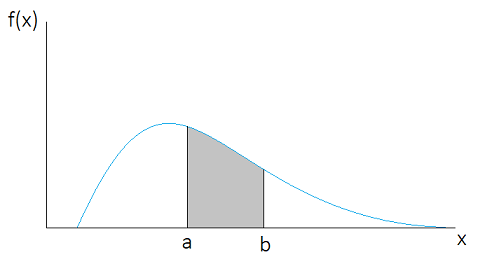

- Area under the total curve equals 1: $\displaystyle\int_{-\infty}^{\infty} f(x)\,dx = 1$
- $f(x) \geq 0$ for all x

(See Devore Ch. 4, or [Probability density functions on Wikipedia](https://en.wikipedia.org/wiki/Probability_density_function) for more information)

## Cumulative Distribution Functions - Theory

The probability, or likelihood, that a number will be *less than or equal to* a given number. Varies from 0 for lowest number to 1 for highest number (on y-axis).

The **cumulative distribution funiton** for a continuous random variable X is for each number x, by:


$F(x) = P(X \leq x) = \displaystyle\int_{-\infty}^{x} f(y)\,dy$

- The area under the curve of the PDF to the left of value x, is the value of the CDF at x

(See Devore Ch. 4, or [Cumulative distribution funciton on Wikipedia](https://en.wikipedia.org/wiki/Cumulative_distribution_function))

---

In the examples below, we are going to use the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) python library to generate PDFs, CDFs. And we'll use the functions in [numpy.random](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html) to generate random numbers from given distributions.

In [1]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

## Uniform Distribution

Also known as a ["continuous uniform distribution"](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)). With a uniform distribution, you have an equal chance of getting any number within the interval.

Probability distribution function: $PDF(x) = 1$
* Our probability for getting a certain number within the distribution is the same within the limits of the interval.

Cumulative distribution function: $CDF(x) = x$
* Example: At 1, we have a 100% chance that a number we pick from the distribution will be less than or equal to 1. At 0.5, we have a 50% chance that a number we pick from the distribution will be less than or equal to 0.5.

In python:
* The uniform distribution in [scipy.stats.uniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html?highlight=uniform#scipy.stats.uniform)
* Generating random numbers from a uniform distribution with [np.random.uniform](https://numpy.org/devdocs/reference/random/generated/numpy.random.uniform.html)



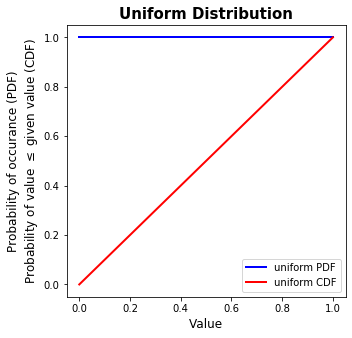

In [2]:
# Example of a uniform distribution

# Create 100 values within the interval from 0 to 1
x = np.linspace(0, 1, 100)

# Create a Uniform Distribution PDF for values of x
uniform_pdf = stats.uniform.pdf(x)

# Create a Uniform Distribution CDF for values of x
uniform_cdf = stats.uniform.cdf(x)

# Make a plot figure
fig, ax = plt.subplots(figsize=(5,5))
# Plot the PDF
ax.plot(x, uniform_pdf, 'b-', lw=2, alpha=1, label='uniform PDF')
# Plot the CDF
ax.plot(x, uniform_cdf, 'r-', lw=2, alpha=1, label='uniform CDF')
# Add a legend
plt.legend(loc='lower right')
# Add axes labels
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Probability of occurance (PDF)\nProbability of value $\leq$ given value (CDF)', fontsize=12)
# Add a title
ax.set_title('Uniform Distribution', fontsize=15, fontweight='bold');

### Question:

What is the **expected (mean) value** of the uniform distribution on the interval [0,1]?

Remember that the mean value is, $\mu = E(x) = \displaystyle\int_{-\infty}^{\infty} x \cdot f(x)\,dx$

---
## Normal Distribution

The [normal (or Gaussian) distribution](https://en.wikipedia.org/wiki/Normal_distribution) Probability Density Function (PDF) is defined by the function:

$PDF(x) = \displaystyle\frac{1}{\sqrt{2\pi\sigma^{2}}}\cdot \exp\bigg(\displaystyle\frac{(x-\mu)^{2}}{2\sigma^{2}}\bigg)$

The highest likelihood of occurance is at the peak, while unlike the uniform distribution, the normal distribution has lower and upper tails that are asymptotes that approach zero. There are non-zero (although very small) chances that a value very far from the mean can come form this distribution.

The example plot below shows the **Standard Normal Distribution** which has a mean = 0, and standard deviation = 1. And therefore the PDF equation can be simplified to:

$PDF(x) = \displaystyle\frac{\exp\big({-x^{2}}/{2}\big)}{\sqrt{2\pi}}$

Most statistical tests we'll be using are based on this Standard Normal Distribution. The x-axis value of the Standard Normal Distirbution is the same as a "Z" (["standard normal variate"](https://en.wikipedia.org/wiki/Standard_score)), which represents the number of standard deviations a value is from the mean.

A number drawn from a normal distribution can be expressed as $N = \mu + Z\cdot\sigma$, which is the mean plus Z number of standard deviations away from the mean.

In python:
* The normal distribution in [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)
* Generating random numbers from a normal distribution with [np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) 


Text(2, 0.5, 'z = 1.65')

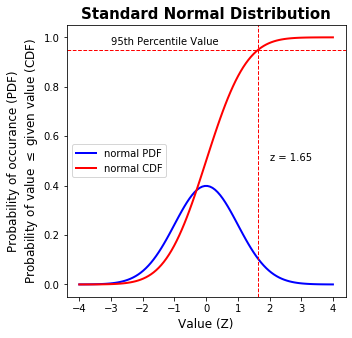

In [3]:
# Example of the "Standard Normal Distribution"

# Create 100 values within the interval from -4 to 4
x = np.linspace(-4, 4, 100)

# Create a Standard Normal Distribution PDF for values of x
normal_pdf = stats.norm.pdf(x)

# Create a Standard Normal Distribution CDF for values of x
normal_cdf = stats.norm.cdf(x)

# Make a plot figure
fig, ax = plt.subplots(figsize=(5,5))
# Plot the PDF
ax.plot(x, normal_pdf, 'b-', lw=2, alpha=1, label='normal PDF')
# Plot the CDF
ax.plot(x, normal_cdf, 'r-', lw=2, alpha=1, label='normal CDF')
# Add a legend
plt.legend(loc='center left')
# Add axes labels
ax.set_xlabel('Value (Z)', fontsize=12)
ax.set_ylabel('Probability of occurance (PDF)\nProbability of value $\leq$ given value (CDF)', fontsize=12)
# Add a title
ax.set_title('Standard Normal Distribution', fontsize=15, fontweight='bold');


# Add 95th percentile line
ax.axhline(0.95, linestyle='--', color='r', lw=1)
ax.text(-3,0.97,'95th Percentile Value')
# Add z=1.65 line
ax.axvline(1.65, linestyle='--', color='r', lw=1)
ax.text(2,0.5,'z = 1.65')

---
## Lognormal Distribution

A non-negative random variable $X$ is said to have a **lognormal distribution** if $ln(X)$ has a normal distribution.

$PDF(x, \mu, \sigma) = \begin{array}{cc}
  \displaystyle\Bigg\{ & 
    \begin{array}{cc}
      \displaystyle\frac{1}{\sqrt{2\pi}\sigma x}\cdot e^{ [-{(ln(x)-\mu)^{2} \, / \, 2\sigma^{2}}]} & x \geq 0 \\
      0 & x \lt 0
    \end{array}
\end{array}
$

**Be careful**: $\mu$ and $\sigma$ here are the mean and standard deviaiton of $ln(X)$, not $X$. The actual mean and variance of $X$, the log-normal distribution, are:

* The expected (mean) value of $X$ is, $E(X) = \exp(\,\mu + \sigma^2/2\,)$

* The variance of $X$ is, $V(X) = \exp(\,2\mu + \sigma^2\,)$

(See Devore Ch. 4)

In python:
* The log-normal distribution in [scipy.stats.lognorm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html)
* Generating random numbers from a log-normal distribution with [np.random.lognormal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.lognormal.html) 

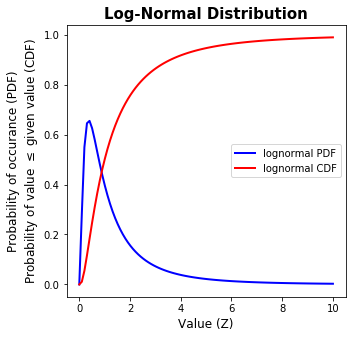

In [4]:
# Example of a log-normal distribution

# Create 100 values within the interval from 0 to 10
x = np.linspace(0, 10, 100)

# Create a Log-Normal Distribution PDF for values of x
lognormal_pdf = stats.lognorm.pdf(x,1)

# Create a Log-Normal Distribution CDF for values of x
lognormal_cdf = stats.lognorm.cdf(x,1)

# Make a plot figure
fig, ax = plt.subplots(figsize=(5,5))
# Plot the PDF
ax.plot(x, lognormal_pdf, 'b-', lw=2, alpha=1, label='lognormal PDF')
# Plot the CDF
ax.plot(x, lognormal_cdf, 'r-', lw=2, alpha=1, label='lognormal CDF')
# Add a legend
plt.legend(loc='center right')
# Add axes labels
ax.set_xlabel('Value (Z)', fontsize=12)
ax.set_ylabel('Probability of occurance (PDF)\nProbability of value $\leq$ given value (CDF)', fontsize=12)
# Add a title
ax.set_title('Log-Normal Distribution', fontsize=15, fontweight='bold');

---
## Binomial Distribution

- We have a sequence of n smaller experiments called **trials**
- The trials have two possible resutls: success or failure (i.e. flipping a coin)
- The trials are independent (the result of one has no impact on any others)
- The **probability**, p, of success is constant throughout all trials.

The binomial random variable X, with n trials is defined as: X = the number of successes among the n trials

$b(x; n, p) = \begin{array}{cc}
  \displaystyle\Bigg\{ & 
    \begin{array}{cc}
      \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x} & x=0,1,2,...,n \\
      0 & otherwise
    \end{array}
\end{array}
$

See also [Binomial distribution on Wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution)

In python:
* The binomial distribution in [scipy.stats.binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)
* Generating random numbers from a binomial distribution with [np.random.binomial](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.binomial.html)
* see also [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function) for discrete random variables

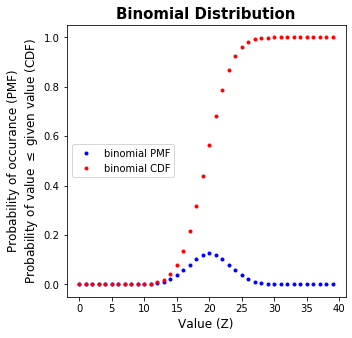

In [5]:
# Example of a log-normal distribution

# Create 100 values within the interval from 0 to 40
x = np.arange(0,40)

# Number of trials
n = 40

# Probability each trial
p = 0.5

# Create a binomial probability mass function for values of x
binom_pmf = stats.binom.pmf(x,n,p)

# Create a binomial distribution CDF for values of x
binom_cdf = stats.binom.cdf(x,n,p)

# Make a plot figure
fig, ax = plt.subplots(figsize=(5,5))
# Plot the Probability Mass Function
ax.plot(x, binom_pmf, 'b.', alpha=1, label='binomial PMF')
# Plot the CDF
ax.plot(x, binom_cdf, 'r.', alpha=1, label='binomial CDF')
# Add a legend
plt.legend(loc='center left')
# Add axes labels
ax.set_xlabel('Value (Z)', fontsize=12)
ax.set_ylabel('Probability of occurance (PMF)\nProbability of value $\leq$ given value (CDF)', fontsize=12)
# Add a title
ax.set_title('Binomial Distribution', fontsize=15, fontweight='bold');